In [6]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [7]:
# load packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns

# import data
df = pd.read_csv('/Users/yingyizhu/Desktop/DATA1030/DATA1030-Fall2023/Midterm Project/london_merged.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [8]:
# print data types
print(df.dtypes)
df.info()

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


cnt
46      46
53      39
33      36
70      36
120     36
        ..
3022     1
3112     1
1338     1
3270     1
2220     1
Name: count, Length: 3781, dtype: int64
count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64


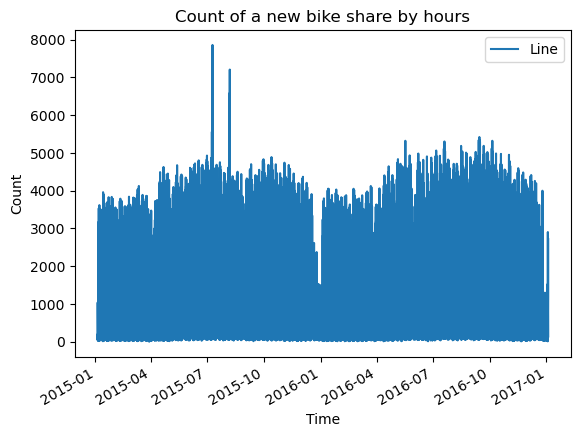

In [9]:
# count
print(df['cnt'].value_counts())
print(df['cnt'].describe())

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a line plot using 'timestamp' as x-axis and 'cnt' as y-axis
df.plot(x='timestamp', y='cnt', kind='line')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of a new bike share by hours')
plt.legend(['Line'])

plt.show()

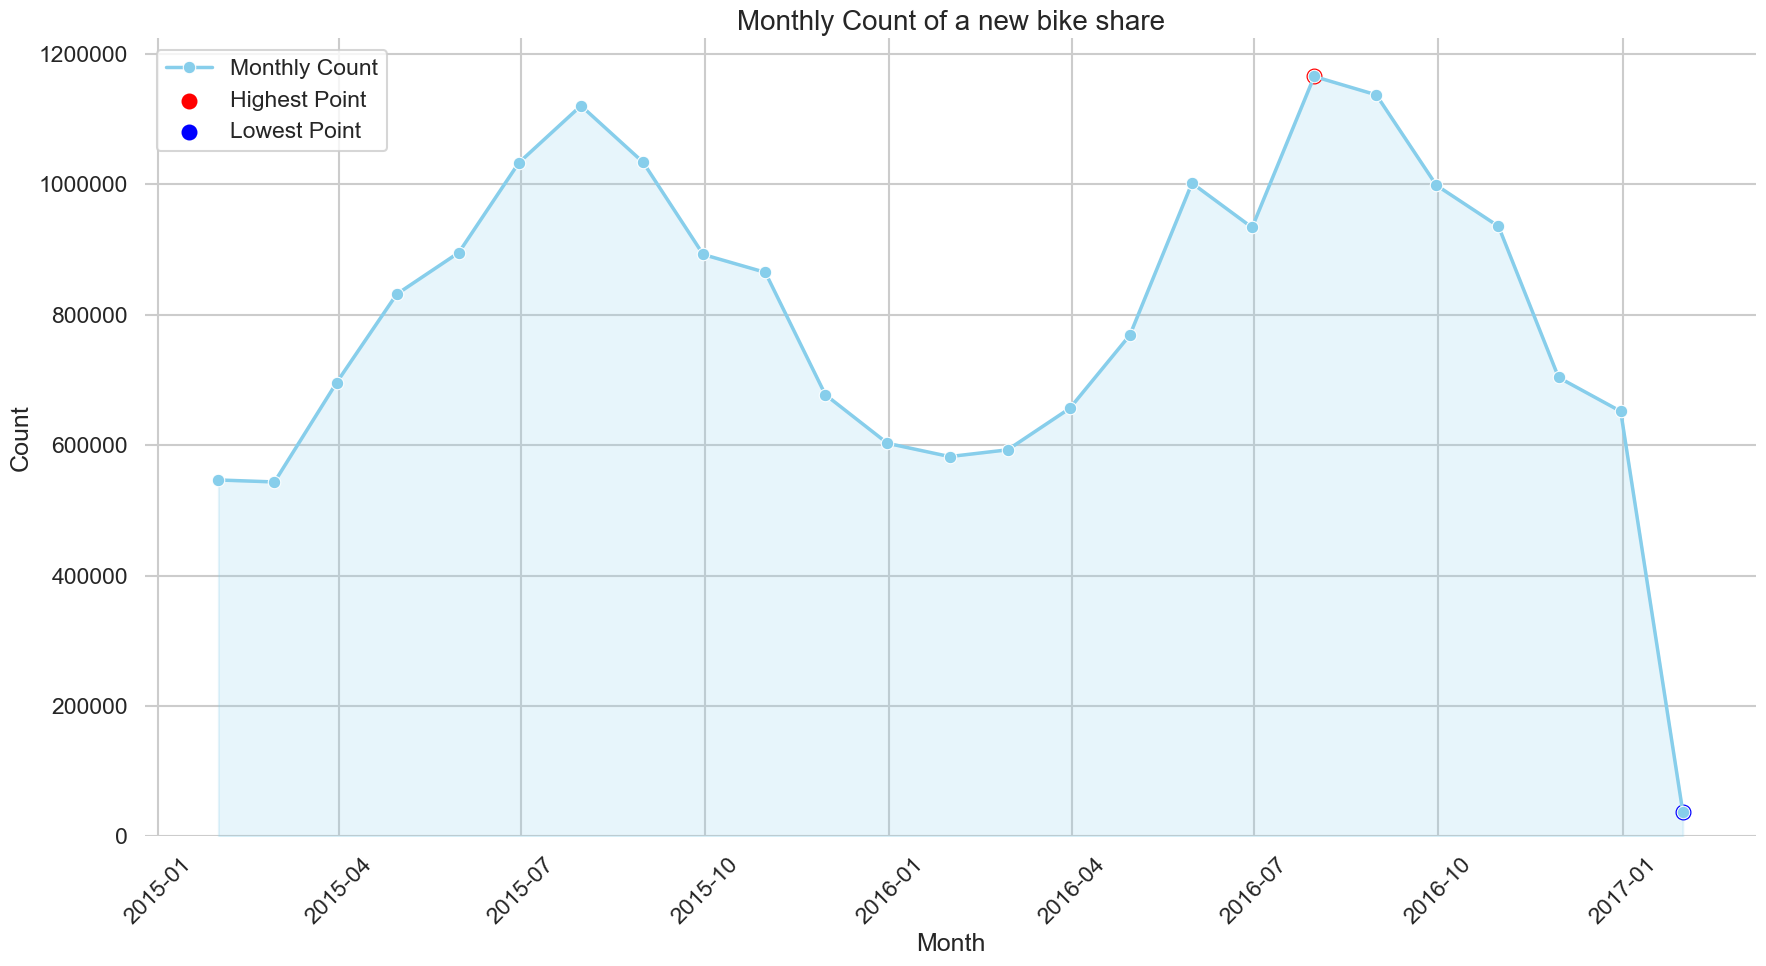

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['timestamp'] = pd.to_datetime(df['timestamp'])
monthly_count = df.resample('M', on='timestamp').sum()['cnt']
data_plot = monthly_count.reset_index(name='cnt')

sns.set_style("whitegrid")
sns.set_context("talk")

# Choose a color palette
palette = sns.color_palette("coolwarm", n_colors=len(data_plot))
plt.figure(figsize=(18, 10))
sns.lineplot(x='timestamp', y='cnt', data=data_plot, marker='o', linestyle='-', color="skyblue", linewidth=2.5, label='Monthly Count')
plt.fill_between(data_plot['timestamp'], data_plot['cnt'], color="skyblue", alpha=0.2)
max_idx = data_plot['cnt'].idxmax()
min_idx = data_plot['cnt'].idxmin()
plt.scatter(data_plot['timestamp'][max_idx], data_plot['cnt'][max_idx], color='red', s=100, label='Highest Point')
plt.scatter(data_plot['timestamp'][min_idx], data_plot['cnt'][min_idx], color='blue', s=100, label='Lowest Point')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count of a new bike share', fontsize=20)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [11]:
# no duplicated rows
df.duplicated().sum()

0

In [12]:
# season

df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

In [13]:
#Is Holiday

df['is_holiday'].replace(1, 'Yes', inplace=True)
df['is_holiday'].replace(0, 'No', inplace=True)

In [14]:
# Is weekend

df['is_weekend'].replace(1, 'Yes', inplace=True)
df['is_weekend'].replace(0, 'No', inplace=True)

In [15]:
#Weather Codes

df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'Scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain/Light Rain', inplace=True)
df['weather_code'].replace(10, 'Rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)

In [16]:
# check the dataset again
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,No,Yes,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No,Yes,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No,Yes,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No,Yes,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No,Yes,Winter
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,Clear,No,Yes,Winter
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,Cloudy,No,Yes,Winter
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,Cloudy,No,Yes,Winter
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,Cloudy,No,Yes,Winter
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,Broken clouds,No,Yes,Winter


In [17]:
df['timestamp'].head()
print(df['weather_code'].value_counts())

weather_code
Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Rain/Light Rain           2141
Cloudy                    1464
snowfall                    60
Rain with thunderstorm      14
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of a new bike share grouped by weather (Log Scale)')

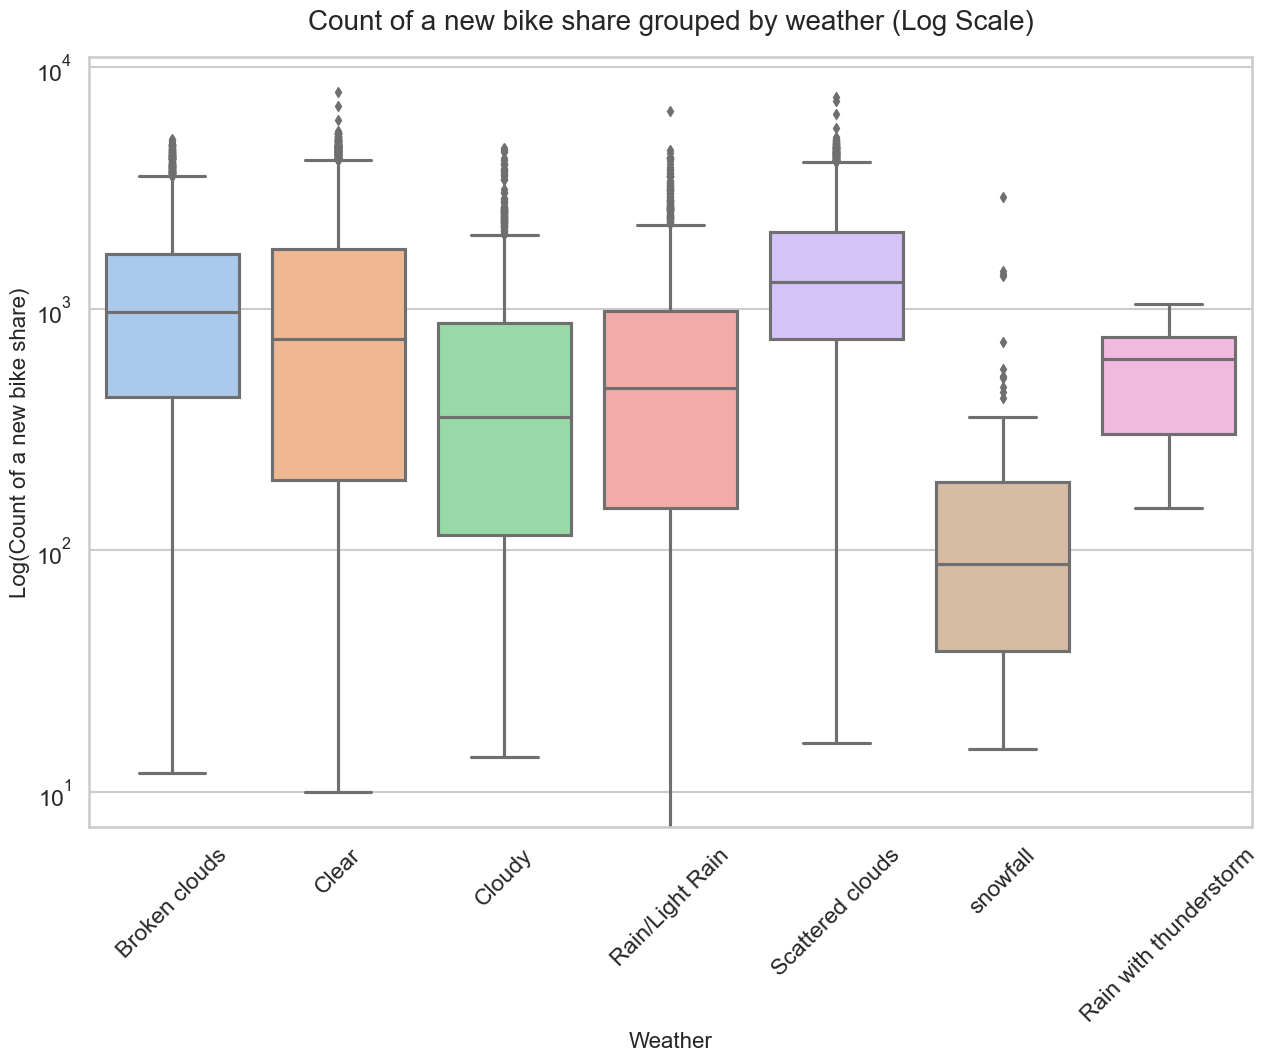

In [18]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(x='weather_code', y='cnt', data=df, ax=ax)
plt.xticks(rotation=45)

ax.set_yscale('log')

ax.set_xlabel('Weather', fontsize=16)
ax.set_ylabel('Log(Count of a new bike share)', fontsize=16)
ax.set_title('Count of a new bike share grouped by weather (Log Scale)', fontsize=20, pad=20)

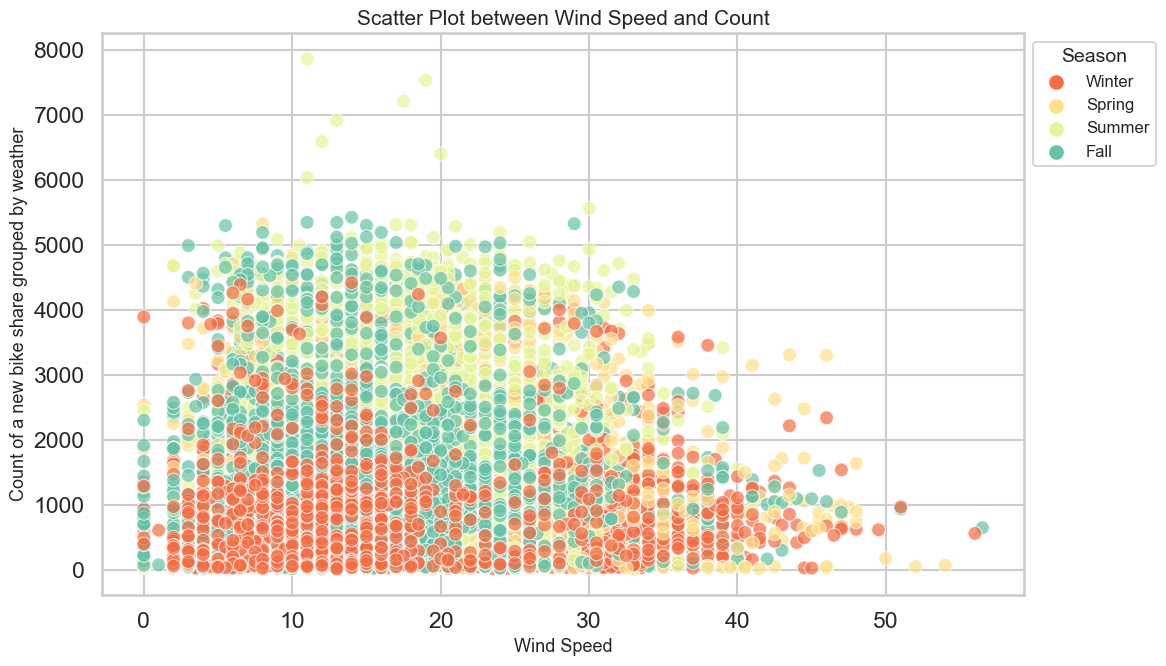

In [19]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='wind_speed', y='cnt', hue='season', data=df, palette='Spectral', s=100, edgecolor='w', alpha=0.7)

plt.xlabel('Wind Speed', fontsize=13)
plt.ylabel('Count of a new bike share grouped by weather', fontsize=13)
plt.title('Scatter Plot between Wind Speed and Count', fontsize=15)
plt.legend(title='Season', title_fontsize='14', fontsize=12, loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

<Figure size 400x400 with 0 Axes>

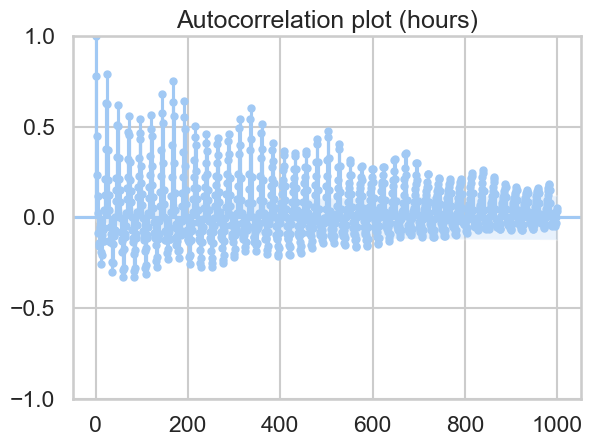

<Figure size 1000x600 with 0 Axes>

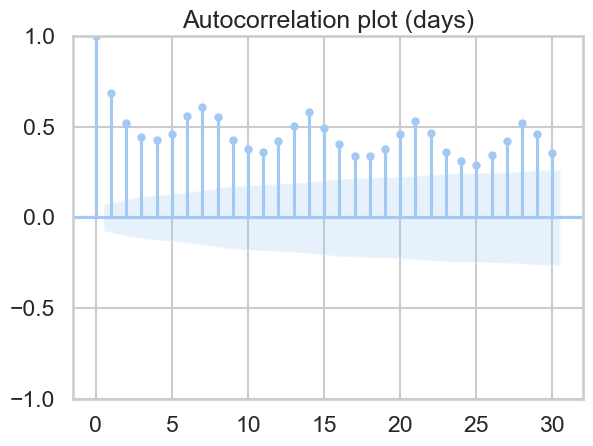

In [20]:
import statsmodels.api as sm

plt.figure(figsize=(4,4))

sm.graphics.tsa.plot_acf(df['cnt'], lags=1000)
plt.title("Autocorrelation plot (hours)")
plt.tight_layout()
plt.show()


daily_df = df.resample('D', on='timestamp').sum()  # Assuming 'timestamp' is the column with datetime data.
plt.figure(figsize=(10,6))
sm.graphics.tsa.plot_acf(daily_df['cnt'], lags=30)  # For example, here it's showing 30 days of lags.
plt.title("Autocorrelation plot (days)")
plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import TimeSeriesSplit

# Step 1: separate test set
total_rows = len(df)

test_size = int(0.2 * total_rows) 
train_val_df = df.iloc[:-test_size]
test_df = df.iloc[-test_size:]

# Step 2: Time-series split
tscv = TimeSeriesSplit(n_splits=3)
for train_index, val_index in tscv.split(train_val_df):
    train_df, val_df = train_val_df.iloc[train_index], train_val_df.iloc[val_index]

X_train, y_train = train_df.drop(columns=['cnt']), train_df['cnt']
X_val, y_val = val_df.drop(columns=['cnt']), val_df['cnt']
X_test, y_test = test_df.drop(columns=['cnt']), test_df['cnt']

# Print out the sizes
print("Training set:", len(X_train), len(y_train))
print("Validation set:", len(X_val), len(y_val))
print("Test set:", len(X_test), len(y_test))


Training set: 10449 10449
Validation set: 3483 3483
Test set: 3482 3482


In [22]:
# Autoregression

# training set
X_train_lag = pd.concat([y_train.shift(3), y_train.shift(2), y_train.shift(1)], axis=1)
X_train_lag.columns = ['lag 3 hours', 'lag 2 hours', 'lag 1 hour']
X_train = pd.concat([X_train, X_train_lag], axis=1)
print(X_train_lag.tail(10))
print(y_train.tail(10))

# validation set
X_val_lag = pd.concat([y_val.shift(3), y_val.shift(2), y_val.shift(1)], axis=1)
X_val_lag.columns = ['lag 3 hours', 'lag 2 hours', 'lag 1 hour']
X_val = pd.concat([X_val, X_val_lag], axis=1)
print(X_val_lag.tail(10))
print(y_val.tail(10))

# test set
X_test_lag = pd.concat([y_test.shift(3), y_test.shift(2), y_test.shift(1)], axis=1)
X_test_lag.columns = ['lag 3 hours', 'lag 2 hours', 'lag 1 hour']
X_test = pd.concat([X_test, X_test_lag], axis=1)
print(X_test_lag.tail(10))
print(y_test.tail(10))

       lag 3 hours  lag 2 hours  lag 1 hour
10439         60.0         37.0        29.0
10440         37.0         29.0        33.0
10441         29.0         33.0       108.0
10442         33.0        108.0       587.0
10443        108.0        587.0      2055.0
10444        587.0       2055.0      3979.0
10445       2055.0       3979.0      1865.0
10446       3979.0       1865.0       860.0
10447       1865.0        860.0       737.0
10448        860.0        737.0       989.0
10439      33
10440     108
10441     587
10442    2055
10443    3979
10444    1865
10445     860
10446     737
10447     989
10448    1034
Name: cnt, dtype: int64
       lag 3 hours  lag 2 hours  lag 1 hour
13922       1872.0       2455.0      4447.0
13923       2455.0       4447.0      4479.0
13924       4447.0       4479.0      2884.0
13925       4479.0       2884.0      1756.0
13926       2884.0       1756.0      1111.0
13927       1756.0       1111.0       860.0
13928       1111.0        860.0       497.0


In [23]:
# data contains no missing values
df.isnull().sum() 

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [24]:
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

onehot_ftrs = ['weather_code','is_holiday','is_weekend','season']
minmax_ftrs = ['hum']
std_ftrs = ['t1','t2', 'lag 3 hours', 'lag 2 hours', 'lag 1 hour']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)
print(X_train_prep)

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Get feature names after transformation
ohe_feature_names = clf.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_ftrs)
# Directly use minmax and std feature names since they don't change
feature_names = list(ohe_feature_names) + minmax_ftrs + std_ftrs

# Convert processed data back into DataFrame
X_train_prep_df = pd.DataFrame(X_train_prep, columns=feature_names)
X_val_prep_df = pd.DataFrame(X_val_prep, columns=feature_names)
X_test_prep_df = pd.DataFrame(X_test_prep, columns=feature_names)

print(X_test_prep_df.head())

(10449, 12)
(10449, 21)
(3483, 21)
(3482, 21)
[[ 1.          0.          0.         ...         nan         nan
          nan]
 [ 0.          1.          0.         ...         nan         nan
  -0.86438261]
 [ 0.          1.          0.         ...         nan -0.8643496
  -0.90691898]
 ...
 [ 1.          0.          0.         ...  2.80601962  0.76258902
  -0.20893591]
 [ 1.          0.          0.         ...  0.76252507 -0.20893404
  -0.32784438]
 [ 0.          0.          0.         ... -0.2089565  -0.32783686
  -0.08422702]]
   weather_code_Broken clouds  weather_code_Clear  weather_code_Cloudy  \
0                         0.0                 1.0                  0.0   
1                         0.0                 1.0                  0.0   
2                         0.0                 1.0                  0.0   
3                         0.0                 0.0                  0.0   
4                         0.0                 0.0                  0.0   

   weather_code_Ra